In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading data
customer_data = pd.read_csv("./ml_case_training_data.csv")

In [2]:
# Summary statistics
print(customer_data.describe())

       campaign_disc_ele      cons_12m  cons_gas_12m  cons_last_month  \
count                0.0  1.609600e+04  1.609600e+04     1.609600e+04   
mean                 NaN  1.948044e+05  3.191164e+04     1.946154e+04   
std                  NaN  6.795151e+05  1.775885e+05     8.235676e+04   
min                  NaN -1.252760e+05 -3.037000e+03    -9.138600e+04   
25%                  NaN  5.906250e+03  0.000000e+00     0.000000e+00   
50%                  NaN  1.533250e+04  0.000000e+00     9.010000e+02   
75%                  NaN  5.022150e+04  0.000000e+00     4.127000e+03   
max                  NaN  1.609711e+07  4.188440e+06     4.538720e+06   

       forecast_base_bill_ele  forecast_base_bill_year  forecast_bill_12m  \
count             3508.000000              3508.000000        3508.000000   
mean               335.843857               335.843857        3837.441866   
std                649.406000               649.406000        5425.744327   
min               -364.940000     

In [3]:
# Checking for duplicated data
print(customer_data.duplicated().sum())

0


In [4]:
# Exploring data types
print(customer_data.dtypes)

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [5]:
# Converting date columns to datetime
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    if col in customer_data.columns:
        customer_data[col] = pd.to_datetime(customer_data[col], format='mixed')


In [6]:
# Dropping columns with big missing values
columns_to_drop = ['campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele',
                   'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons']
customer_data = customer_data.drop(columns=columns_to_drop)

In [7]:
# Exploring 'activity_new' column
print(customer_data['activity_new'].unique())
activity = customer_data['activity_new'].value_counts().reset_index()
activity.columns = ['activity_new', 'Count']
print(activity)

['esoiiifxdlbkcsluxmfuacbdckommixw' nan 'sfisfxfcocfpcmckuekokxuseixdaoeu'
 'sscfoipxikopfskekuobeuxkxmwsuucb' 'cssldxpacdmuuaulamxdekcokibauube'
 'ppcxfxbffsxaakxamcdpexdoxulfwwae' 'kkklcdamwfafdcfwofuscwfwadblfmce'
 'apdekpcbwosbxepsfxclislboipuxpop' 'xwkaesbkfsacseixxksofpddwfkbobki'
 'lckfspcixfmlwudlisbaiacuioicciam' 'daobdssbkieoukwxbopxiiospudkopwl'
 'cccpsslxcemdlomsaffxsecccbxpdkax' 'kwuslieomapmswolewpobpplkaooaaew'
 'ifppdlcfssupdcsdcclkoubulccouwml' 'mwmuuaeloxbawummwfwcmxckmsfibpwk'
 'almlfkoedpwfdmmsebsdwueskducuiok' 'wlxfbefauebfbauopppswxppaafdkoap'
 'cwkwaxadbfukekuspislmbipbkxdudla' 'cluecxlameloamldmasudocsbmaoamdw'
 'pmccdfmdxpmdeodsasdeboedildifmlp' 'paoauaefwcbedmiowwmokakuisslckbd'
 'bapcuxcousodpaabofsesslupodaapcx' 'dupxuibdflmskeieweeofcaluuuiioix'
 'fmwdwsxillemwbbwelxsampiuwwpcdcb' 'xbsbaipfluioualwapemiublmepsbuoo'
 'sbimkkplabbebeauuidmbiopofmamcau' 'xlwlakkoiebpwueucmdpsslcfiaxeuec'
 'awoxilkbfwkemdseewlpbolidusdaeim' 'wwsobfkddbekdkdawkeiemomebebebii'
 '

In [8]:
# Replacing NA in 'activity_new' with 'new_category'
customer_data['activity_new'] = customer_data['activity_new'].fillna('new_category')

In [9]:
# Exploring 'channel_sales' column
print(customer_data['channel_sales'].unique())
num_channel = customer_data['channel_sales'].value_counts().reset_index()
num_channel.columns = ['channel_sales', 'Count']
print(num_channel)

# Replacing NA in 'channel_sales' with the most frequent value
customer_data['channel_sales'] = customer_data['channel_sales'].fillna(customer_data['channel_sales'].mode()[0])

['lmkebamcaaclubfxadlmueccxoimlema' 'foosdfpfkusacimwkcsosbicdxkicaua' nan
 'usilxuppasemubllopkaafesmlibmsdf' 'ewpakwlliwisiwduibdlfmalxowmwpci'
 'epumfxlbckeskwekxbiuasklxalciiuu' 'sddiedcslfslkckwlfkdpoeeailfpeds'
 'fixdbufsefwooaasfcxdxadsiekoceaa']
                      channel_sales  Count
0  foosdfpfkusacimwkcsosbicdxkicaua   7377
1  lmkebamcaaclubfxadlmueccxoimlema   2073
2  usilxuppasemubllopkaafesmlibmsdf   1444
3  ewpakwlliwisiwduibdlfmalxowmwpci    966
4  sddiedcslfslkckwlfkdpoeeailfpeds     12
5  epumfxlbckeskwekxbiuasklxalciiuu      4
6  fixdbufsefwooaasfcxdxadsiekoceaa      2


In [10]:
# Exploring 'origin_up' column
print(customer_data['origin_up'].unique())
num_origin = customer_data['origin_up'].value_counts().reset_index()
num_origin.columns = ['origin_up', 'Count']
print(num_origin)

# Replacing NA in 'origin_up' with the most frequent value
customer_data['origin_up'] = customer_data['origin_up'].fillna(customer_data['origin_up'].mode()[0])

['ldkssxwpmemidmecebumciepifcamkci' 'lxidpiddsbxsbosboudacockeimpuepw'
 'kamkkxfxxuwbdslkwifmmcsiusiuosws' nan 'usapbepcfoloekilkwsdiboslwaxobdp'
 'ewxeelcelemmiwuafmddpobolfuxioce']
                          origin_up  Count
0  lxidpiddsbxsbosboudacockeimpuepw   7825
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   4517
2  ldkssxwpmemidmecebumciepifcamkci   3664
3  usapbepcfoloekilkwsdiboslwaxobdp      2
4  ewxeelcelemmiwuafmddpobolfuxioce      1


In [11]:
# Converting 'has_gas' to numeric
customer_data['has_gas'] = customer_data['has_gas'].map({'f': 0, 't': 1})

In [12]:
# Filling NA values with median for several columns
columns_to_fill = ['forecast_discount_energy', 'forecast_price_energy_p1', 'forecast_price_energy_p2',
                   'forecast_price_pow_p1', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
for col in columns_to_fill:
    customer_data[col] = customer_data[col].fillna(customer_data[col].median())

In [13]:
# Filling NA values with median for date columns
date_columns_to_fill = ['date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns_to_fill:
    customer_data[col] = customer_data[col].fillna(customer_data[col].median())

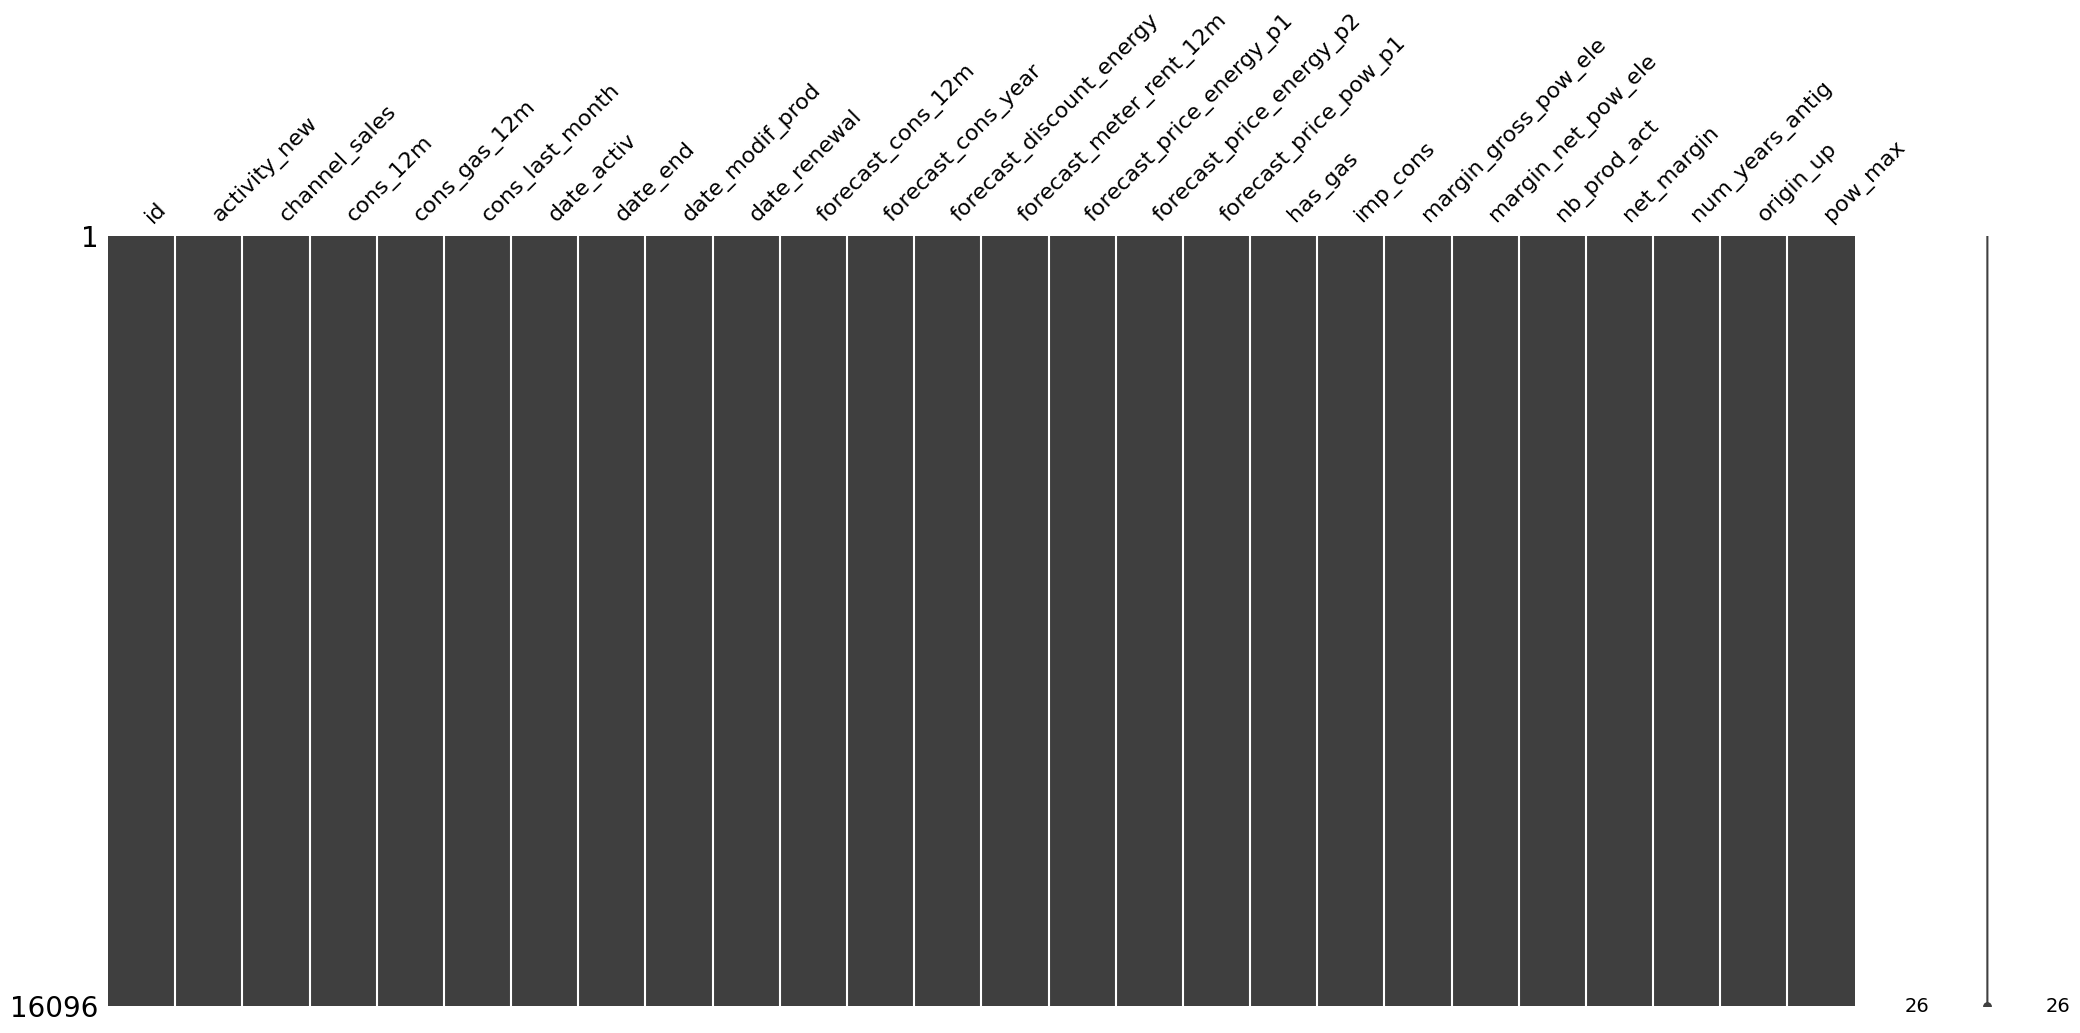

In [14]:
# Visualizing missing values
import missingno as msno
msno.matrix(customer_data)
plt.show()

In [15]:
columns_to_replace = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
                      'forecast_meter_rent_12m', 'forecast_price_pow_p1', 'imp_cons', 'pow_max']

# Create a boolean mask for negative values in the specified columns
negative_mask = customer_data[columns_to_replace] < 0

# Filter the DataFrame to get rows with negative values in any of the specified columns
negative_values_df = customer_data[negative_mask.any(axis=1)]

print(negative_values_df)

                                     id                      activity_new  \
689    9381c75416e2143ec498f81348c2c9c3                      new_category   
798    dfde94d8e0cef6415a3bd91f522b8fd7  wfiuolfffsekuoimxdsasfwcmwssewoi   
916    036c836c4d3e5a7e72e115cd3457f7f7  uiouuawillpcssldoeemcddcpfseebsw   
1037   d9207ee16592011253eef1bad33e3646                      new_category   
1042   8be67352376dd58c34c141b0fe2dad17                      new_category   
...                                 ...                               ...   
14918  640be6b6b611728423cb32f8d324ff57  apdekpcbwosbxepsfxclislboipuxpop   
14920  ca2ac4600beafeec0742efbf7e006efc  apdekpcbwosbxepsfxclislboipuxpop   
15157  99125251ba1136d0aad111806f638371  pffpiboilxxdeluedfxssmaklbdplfmi   
15206  27276020e48d73f589788d4e37c51879  ibkiiwcxiccxpoedpweiuxwbxbuewbxm   
15993  c1190f3d5f8d280d7fc70b3ba964d6e2                      new_category   

                          channel_sales  cons_12m  cons_gas_12m  \
689    f

In [16]:
# # Replacing negative values with median
# for col in columns_to_replace:
#     median = customer_data[col].median()
#     customer_data.loc[customer_data[col] < 0, col] = median

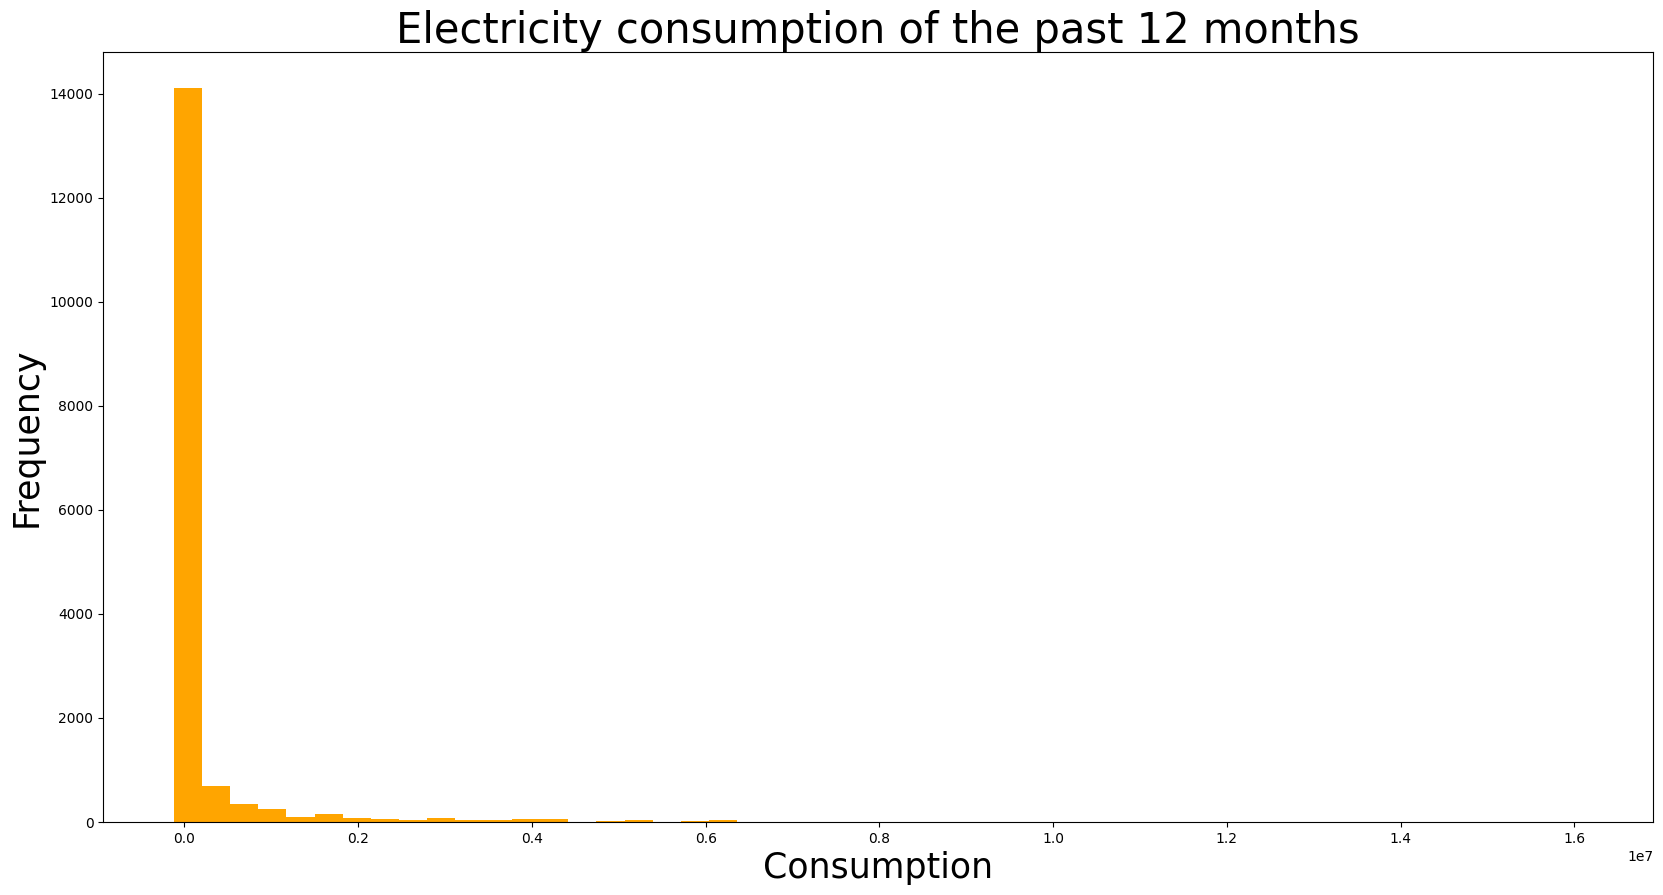

In [17]:
# Plotting histograms
plt.figure(figsize=(20, 10))
plt.hist(customer_data['cons_12m'], bins=50, color='orange')
plt.title("Electricity consumption of the past 12 months", fontsize=30)
plt.xlabel('Consumption', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.show()

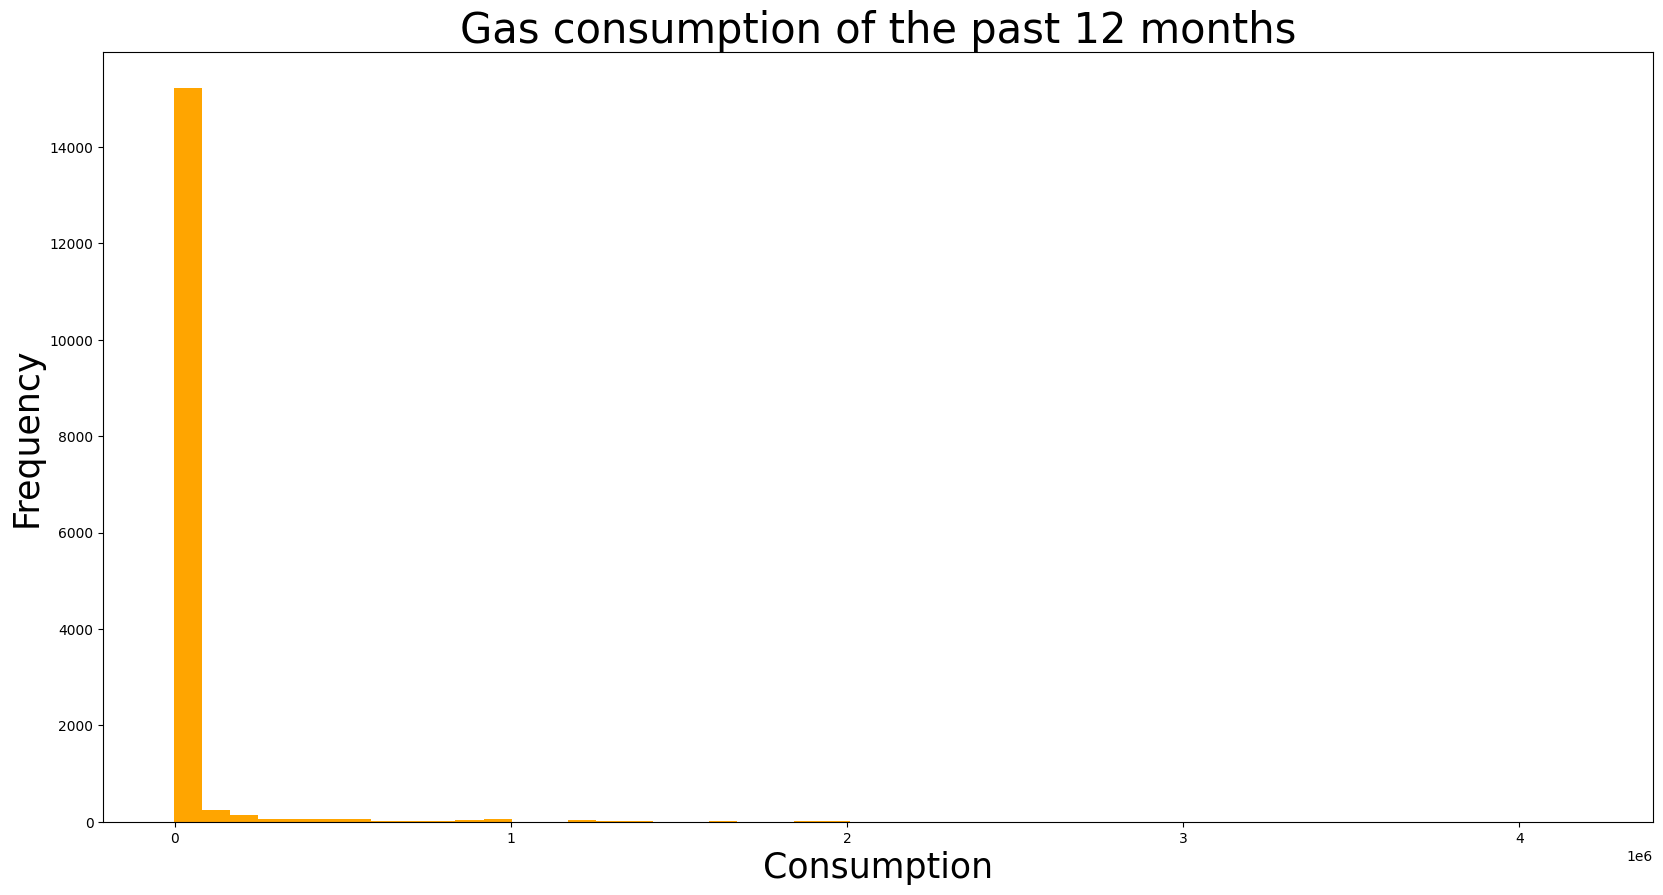

In [18]:
plt.figure(figsize=(20, 10))
plt.hist(customer_data['cons_gas_12m'], bins=50, color='orange')
plt.title("Gas consumption of the past 12 months", fontsize=30)
plt.xlabel('Consumption', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.show()

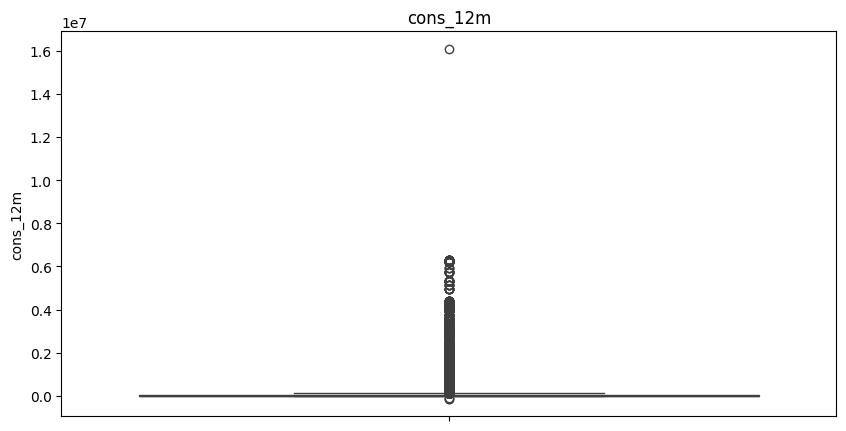

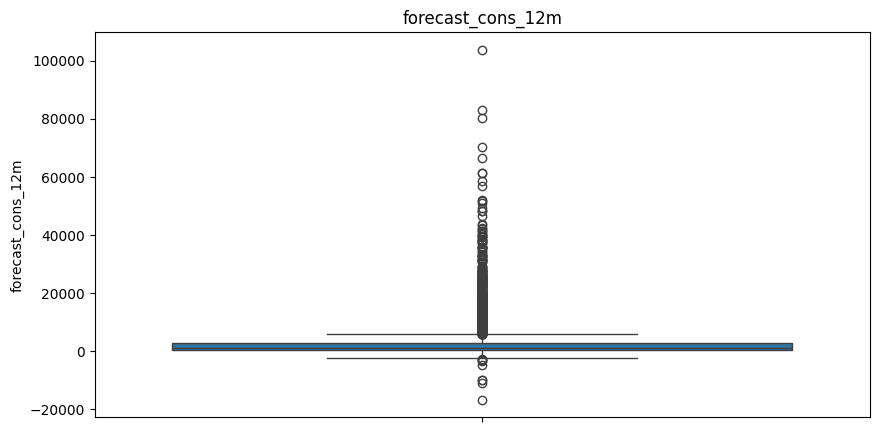

In [19]:
# Plotting boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(y=customer_data['cons_12m'])
plt.title('cons_12m')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(y=customer_data['forecast_cons_12m'])
plt.title('forecast_cons_12m')
plt.show()

Number of outliers: 408


/tmp/ipykernel_119060/1760911033.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15332.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  customer_data.loc[z_scores > 3, 'cons_12m'] = customer_data['cons_12m'].median()


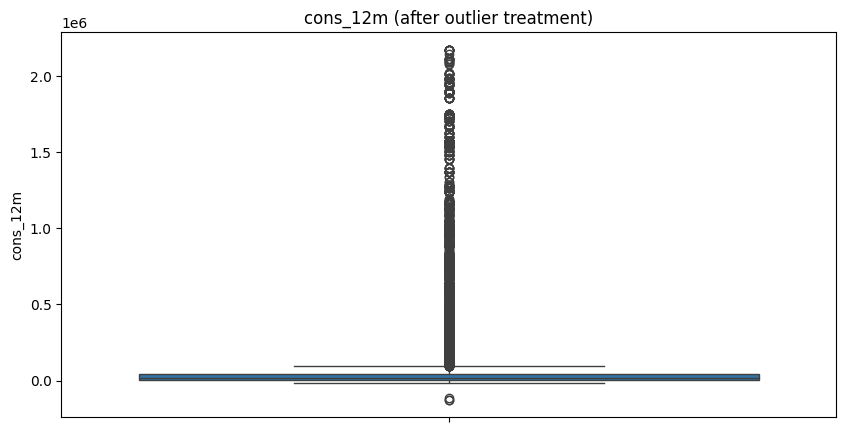

Number of outliers in cons_gas_12m: 281
Number of outliers in cons_last_month: 348
Number of outliers in forecast_cons_12m: 261
Number of outliers in forecast_cons_year: 192
Number of outliers in forecast_discount_energy: 575
Number of outliers in forecast_meter_rent_12m: 384
Number of outliers in forecast_price_energy_p1: 300
Number of outliers in forecast_price_energy_p2: 0
Number of outliers in forecast_price_pow_p1: 240
Number of outliers in imp_cons: 210
Number of outliers in margin_gross_pow_ele: 238
Number of outliers in margin_net_pow_ele: 220
Number of outliers in nb_prod_act: 60
Number of outliers in net_margin: 185
Number of outliers in num_years_antig: 378
Number of outliers in pow_max: 293


In [20]:
# Handling outliers
z_scores = np.abs(stats.zscore(customer_data['cons_12m']))
outliers = np.sum(z_scores > 3)
print(f"Number of outliers: {outliers}")
customer_data.loc[z_scores > 3, 'cons_12m'] = customer_data['cons_12m'].median()

# Plotting boxplot after outlier treatment
plt.figure(figsize=(10, 5))
sns.boxplot(y=customer_data['cons_12m'])
plt.title('cons_12m (after outlier treatment)')
plt.show()

# List of columns to handle outliers
columns_to_handle = [
    'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
    'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1',
    'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele',
    'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max'
]

# Function to handle outliers
def handle_outliers(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = np.sum(z_scores > 3)
    print(f"Number of outliers in {column}: {outliers}")
    df.loc[z_scores > 3, column] = df[column].median()

# Apply the function to each column
for col in columns_to_handle:
    handle_outliers(customer_data, col)

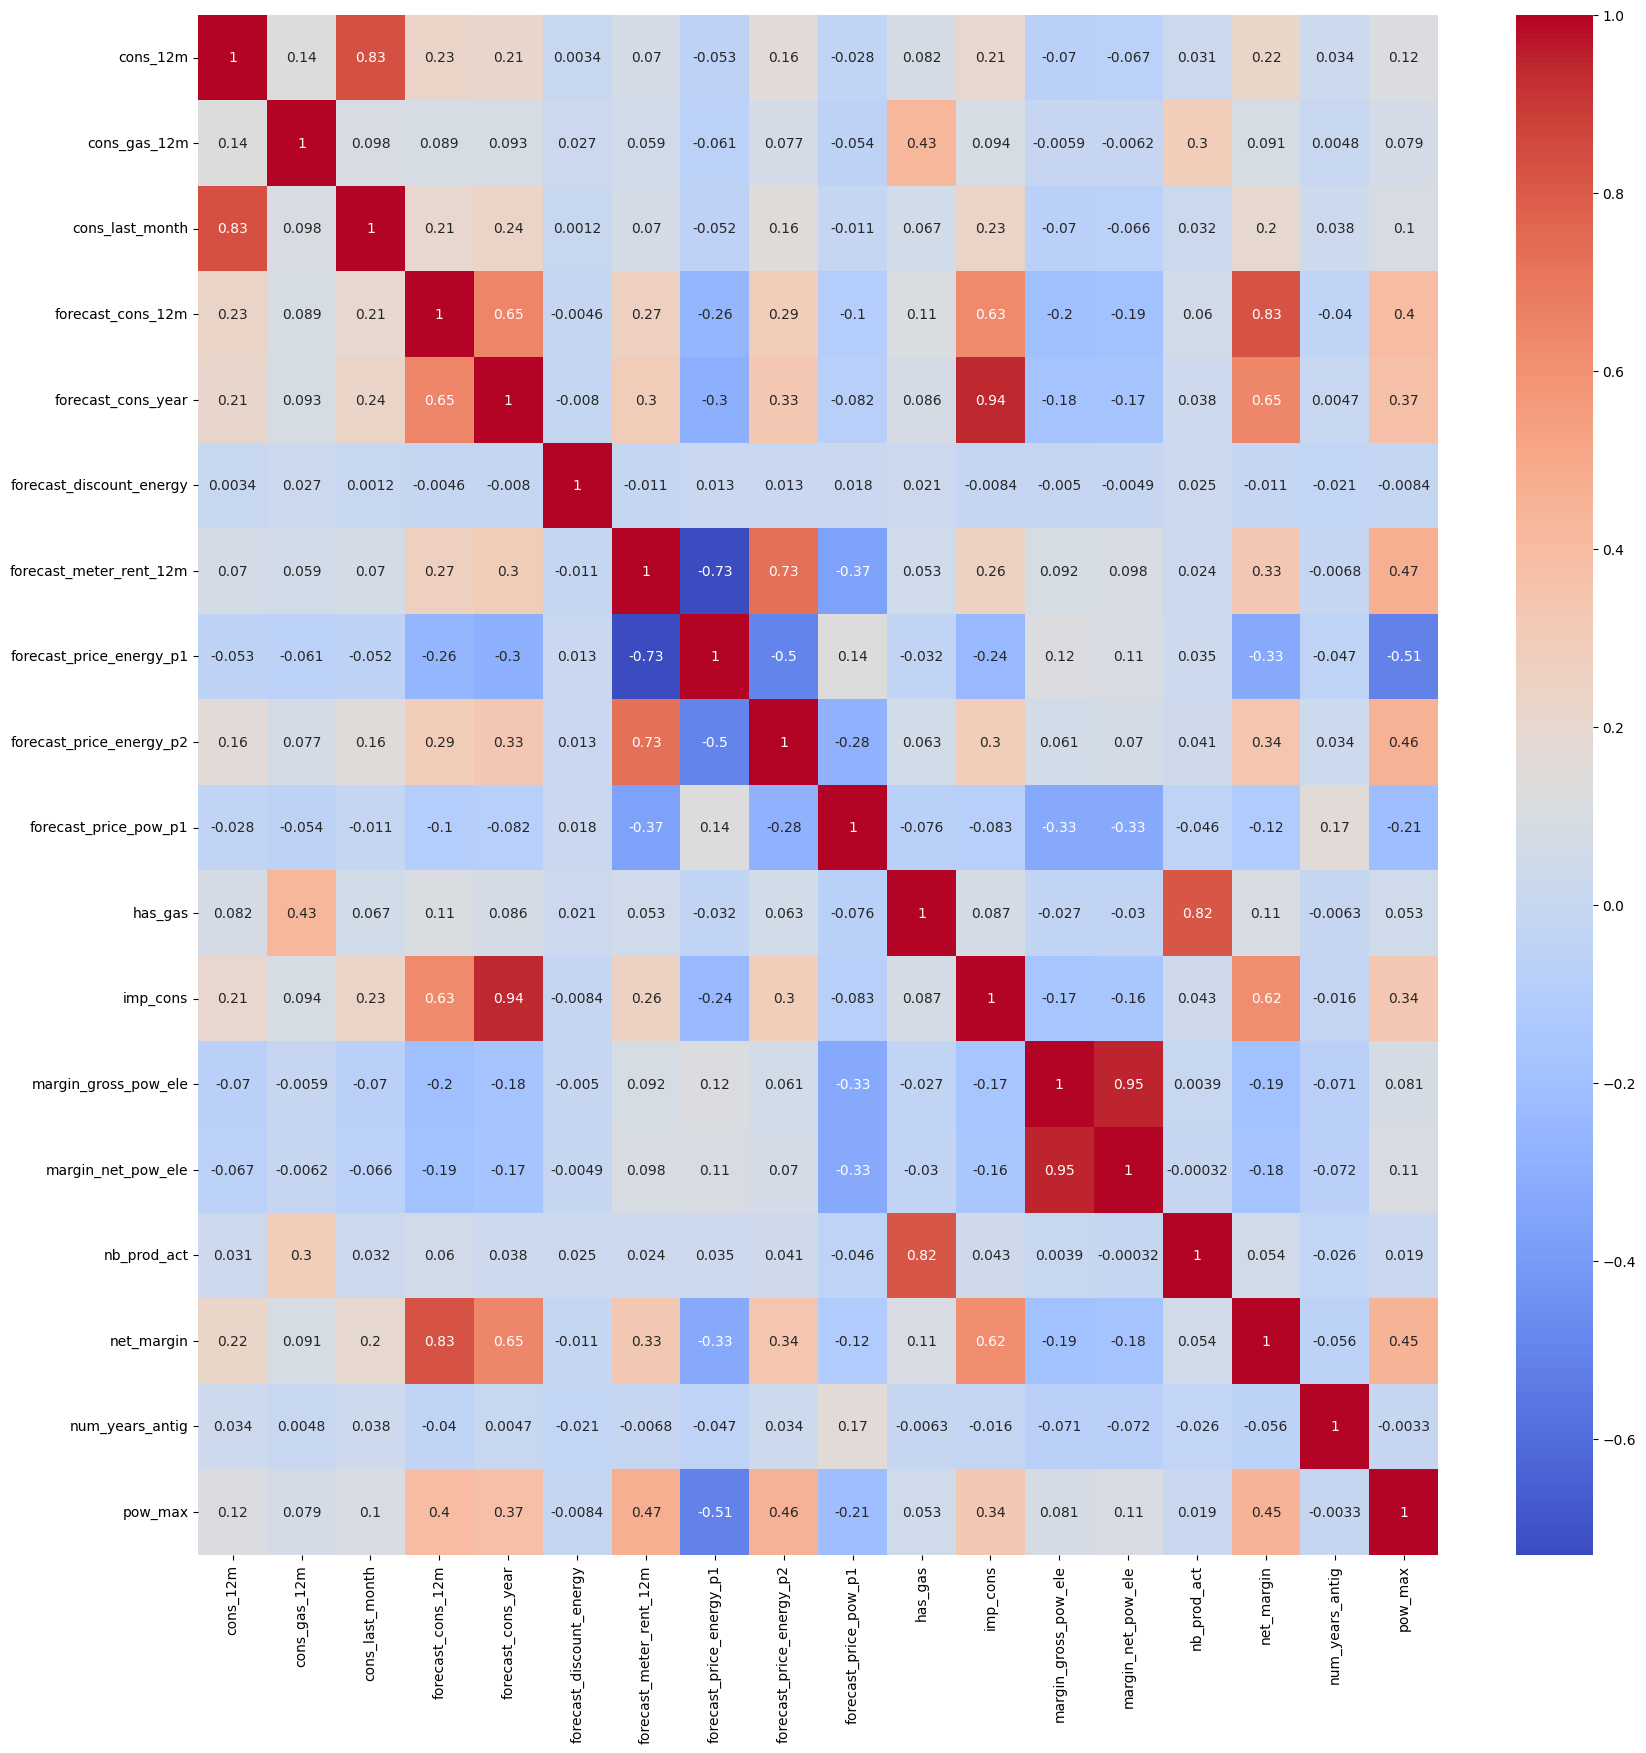

In [21]:
# column with number data types
continuous = customer_data.select_dtypes(include=[np.number])

# Correlation plot
plt.figure(figsize=(20, 20))
sns.heatmap(continuous.corr(), annot=True, cmap='coolwarm')
plt.show()

# # Final data selection
final_data = continuous.drop(['forecast_cons_year', 'margin_net_pow_ele'], axis=1)


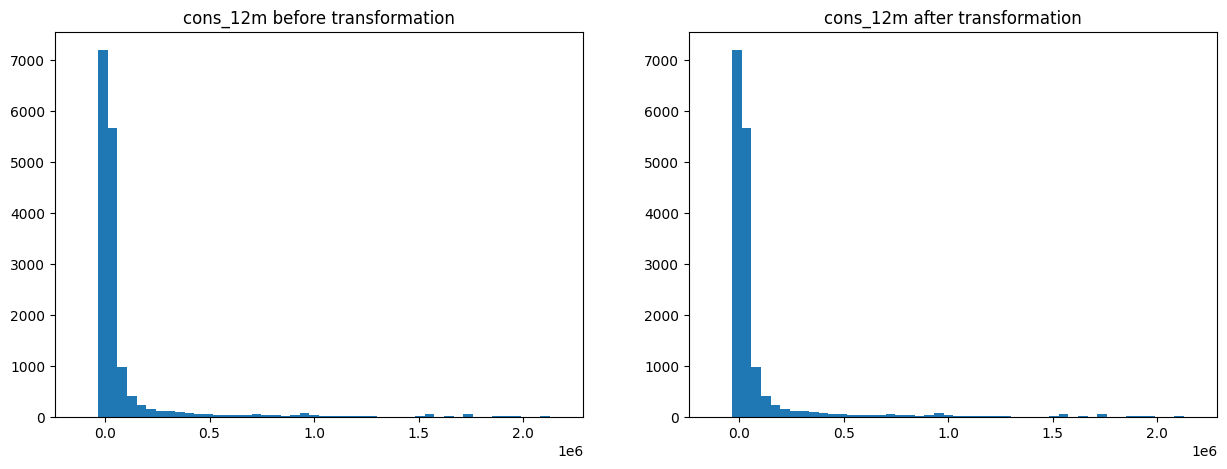

In [22]:
# Plotting histograms before and after transformation
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(customer_data['cons_12m'], bins=50)
plt.title('cons_12m before transformation')
plt.subplot(1, 2, 2)
plt.hist(final_data['cons_12m'], bins=50)
plt.title('cons_12m after transformation')
plt.show()

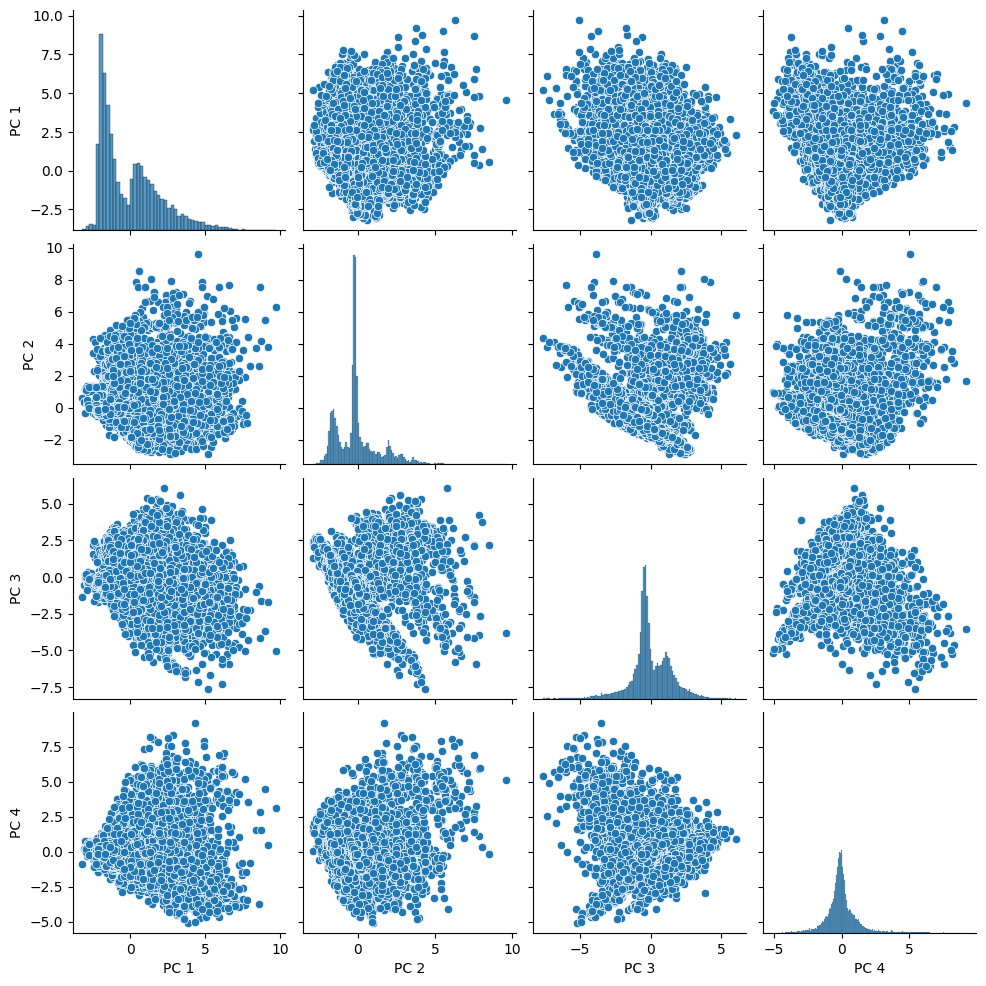

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data)

pca = PCA()
pc = pca.fit_transform(scaled_data)

pc_df = pd.DataFrame(pc, columns=[f'PC {i+1}' for i in range(pc.shape[1])])

sns.pairplot(pc_df.iloc[:, :4])  # Pairplot of first 4 principal components
plt.show()

Explained variance ratio by each component:
[0.24764073 0.13099691 0.11892056 0.09393209 0.07687129 0.06272991
 0.05460224 0.04730506 0.04051635 0.03320271 0.02679693 0.02567183
 0.01089424 0.01036243 0.01004333 0.00951339]
Cumulative variance:
[0.24764073 0.37863763 0.4975582  0.59149029 0.66836158 0.73109149
 0.78569373 0.83299879 0.87351514 0.90671785 0.93351477 0.95918661
 0.97008085 0.98044327 0.99048661 1.        ]


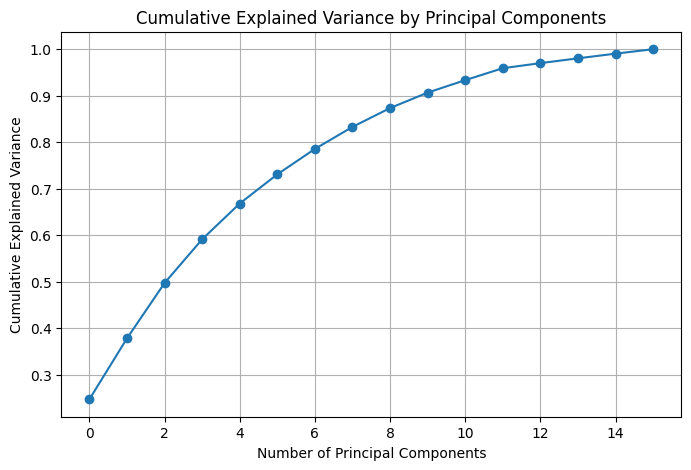

In [24]:
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative variance:")
print(cumulative_variance)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [25]:
pca = PCA(n_components=10)
pca.fit(final_data)

reduce_data = pca.transform(final_data)

In [26]:
# save the rreduced data as a csv file
reduce_data = pd.DataFrame(reduce_data, columns=[f'PC {i+1}' for i in range(reduce_data.shape[1])])
reduce_data.to_csv('reduced_data.csv', index=False)